In [28]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns

# Import API key
from api_keys import api_key
#print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Initialize a cities dataframe to collect lat, long, etc per city
citiesDF = pd.DataFrame() 
# Assign the lat and lng as the first two columns of the data frame to be used later to locate the city


## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
#lat_lngs = []
#cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lats = np.random.choice(range(-90,90),1500)
lngs = np.random.choice(range(-180,180),1500)

citiesDF = pd.DataFrame({"cityLat":lats,"cityLng":lngs})        
citiesDF.head()


# Initialize the remaining colums of the data frame to be populated and used later...
citiesDF['city']    = ""    # Closest City Name        
citiesDF['cityCCd'] = ""    # Country Code
citiesDF['cityTmp'] = ""    # City Temperature
citiesDF['cityHum'] = ""    # City Humidity
citiesDF['cityCld'] = ""    # City Cloudiness
citiesDF['cityWnd'] = ""    # City Wind Speed

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#print(lat_lngs)

# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
#    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
#    if city not in cities:
#        cities.append(city)

# Print the city count to confirm sufficient count
#print(cities)
print(len(citiesDF))
citiesDF.head()

1500


,cityLat,cityLng,city,cityCCd,cityTmp,cityHum,cityCld,cityWnd
0,87,-54,,,,,,
1,75,111,,,,,,
2,45,-158,,,,,,
3,-61,73,,,,,,
4,44,-48,,,,,,


In [30]:
# Loop thru the citiesDF dataframe, use the citypy library to get the nearest city names and country codes
for index,row in citiesDF.iterrows():
    city = citipy.nearest_city(row['cityLat'],row['cityLng'])
    citiesDF.loc[index,'city'] = city.city_name
    citiesDF.loc[index,'cityCCd'] = city.country_code.upper()
citiesDF.head()

,cityLat,cityLng,city,cityCCd,cityTmp,cityHum,cityCld,cityWnd
0,87,-54,upernavik,GL,,,,
1,75,111,saskylakh,RU,,,,
2,45,-158,kodiak,US,,,,
3,-61,73,saint-philippe,RE,,,,
4,44,-48,torbay,CA,,,,


In [31]:
# Now that we have a list of 1500, reduce this list to 500 unique cities and reset index as follows:
citiesDF = citiesDF.drop_duplicates()
citiesDF = citiesDF.sample(500)
citiesDF = citiesDF.reset_index()
citiesDF.head()

,index,cityLat,cityLng,city,cityCCd,cityTmp,cityHum,cityCld,cityWnd
0,1245,-77,-108,punta arenas,CL,,,,
1,170,72,-58,upernavik,GL,,,,
2,157,-89,30,kruisfontein,ZA,,,,
3,774,65,-57,sisimiut,GL,,,,
4,825,41,-147,kodiak,US,,,,


## Perform API Calls

In [32]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :api_key,"units":"imperial" }
#units=Imperial&APPID=" + api_key 
#print(url)

for index,row in citiesDF.iterrows():
    # assemble url and make API request
    params["q"] =f'{row["city"]},{row["cityCCd"]}'
    #print(f"Retrieving Results for Index {index}: {params['q']}")
    response = requests.get(url, params=params)
    #print(response)
    if response.status_code == 200:
        # Process the Response
        #print(f"Good Response {response.status_code} For Results In Index {index}: {params['q']}")
        respJson = response.json()
        citiesDF.loc[index,'cityTmp'] = respJson["main"]["temp"]
        citiesDF.loc[index,'cityHum'] = respJson["main"]["humidity"]
        citiesDF.loc[index,'cityCld'] = respJson["clouds"]["all"]
        citiesDF.loc[index,'cityWnd'] = respJson["wind"]["speed"]
    else:
        print(f"Bad Response {response.status_code} For Results In Index {index}: {params['q']}")
   
    

Bad Response 404 For Results In Index 12: taolanaro,MG
Bad Response 404 For Results In Index 24: barentsburg,SJ
Bad Response 404 For Results In Index 26: belushya guba,RU
Bad Response 404 For Results In Index 43: laguna,BR
Bad Response 404 For Results In Index 60: qunduz,AF
Bad Response 404 For Results In Index 81: grand river south east,MU
Bad Response 404 For Results In Index 84: tumannyy,RU
Bad Response 404 For Results In Index 91: mataura,PF
Bad Response 404 For Results In Index 97: taolanaro,MG
Bad Response 404 For Results In Index 123: saryshagan,KZ
Bad Response 404 For Results In Index 124: sinkat,SD
Bad Response 404 For Results In Index 137: mataura,PF
Bad Response 404 For Results In Index 145: tabiauea,KI
Bad Response 404 For Results In Index 148: afmadu,SO
Bad Response 404 For Results In Index 149: belushya guba,RU
Bad Response 404 For Results In Index 159: mataura,PF
Bad Response 404 For Results In Index 160: chagda,RU
Bad Response 404 For Results In Index 162: bolshoye soro

In [33]:

citiesDF.head()

,index,cityLat,cityLng,city,cityCCd,cityTmp,cityHum,cityCld,cityWnd
0,1245,-77,-108,punta arenas,CL,48.2,39,0,14.99
1,170,72,-58,upernavik,GL,34.22,100,92,26.53
2,157,-89,30,kruisfontein,ZA,55.28,92,8,5.17
3,774,65,-57,sisimiut,GL,32.6,83,80,2.59
4,825,41,-147,kodiak,US,71.06,23,1,10.29


In [35]:
#Remove all null and empty rows, otherwise scatter plot will not work
citiesDF['cityTmp'].replace('', np.nan, inplace=True)
citiesDF = citiesDF.dropna()

In [36]:
citiesDF.head()

,index,cityLat,cityLng,city,cityCCd,cityTmp,cityHum,cityCld,cityWnd
0,1245,-77,-108,punta arenas,CL,48.20,39,0,14.99
1,170,72,-58,upernavik,GL,34.22,100,92,26.53
2,157,-89,30,kruisfontein,ZA,55.28,92,8,5.17
3,774,65,-57,sisimiut,GL,32.60,83,80,2.59
4,825,41,-147,kodiak,US,71.06,23,1,10.29


# Temperature (F) versus Latitude

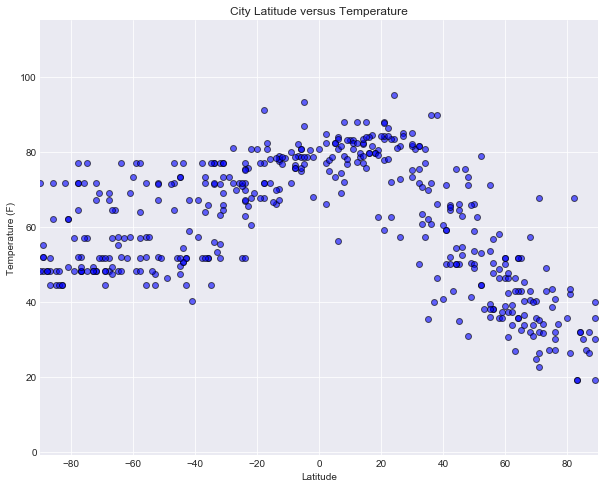

In [37]:
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(citiesDF['cityLat'], citiesDF['cityTmp'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(citiesDF['cityTmp'])-20, max(citiesDF['cityTmp'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")
ax.set_title("City Latitude versus Temperature")

# Save png images for each scatter plot.
plt.savefig("CityLat_Temp.png")

In [ ]:
plt.show()

# Humidity (%) versus Latitude

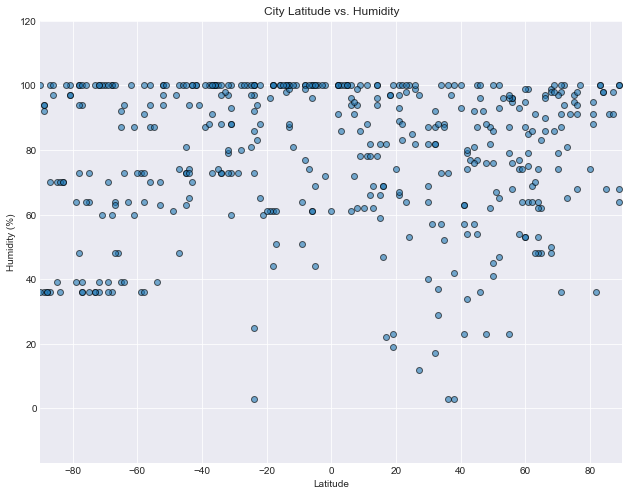

In [38]:
sns.set_style("darkgrid") 
g = sns.lmplot(x="cityLat", y='cityHum', data=citiesDF, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Humidity (%)")
     .set(xlim=(-90, 90), ylim=(min(citiesDF['cityHum'])-20, max(citiesDF['cityHum'])+20)))
plt.title("City Latitude vs. Humidity")

# Save png images for each scatter plot.
plt.savefig("CityLat_Humidity.png")

In [39]:
plt.show()

# Cloudy (%) vs. Latitude¶

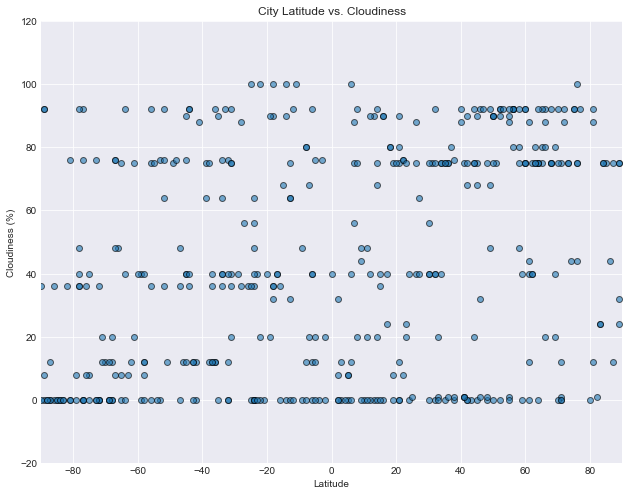

In [40]:
sns.set_style("darkgrid") 
g = sns.lmplot(x="cityLat", y='cityCld', data=citiesDF, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Cloudiness (%)")
     .set(xlim=(-90, 90), ylim=(min(citiesDF['cityCld'])-20, max(citiesDF['cityCld'])+20)))
plt.title("City Latitude vs. Cloudiness")

# Save png images for each scatter plot.
plt.savefig("CityLat_Cloudiness.png")

In [41]:
plt.show()